# Survival Analysis - Breast Cancer

<i>Survival analysis is the study of survival times and of the factors that influence them. It is is a statistical method to investigate the expected duration of time until an event of interest occurs. The goals of survival analysis are to estimate the survival distribution, to compare two or more survival distributions, or to assess the effects on a number of factors on survival.</i>

<i>For data I will use the german breast cancer dataset available in the sksurv package.</i>

## Import Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
from sksurv.datasets import load_gbsg2

data_x, data_y = load_gbsg2()
pd.DataFrame(data_y).head()

,cens,time
0,True,1814.0
1,True,2018.0
2,True,712.0
3,True,1807.0
4,True,772.0


## Estimating the Survival Curve

In [3]:
data_x.columns

Index(['age', 'estrec', 'horTh', 'menostat', 'pnodes', 'progrec', 'tgrade',
       'tsize'],
      dtype='object')

In [4]:
data_y = pd.DataFrame(data_y)

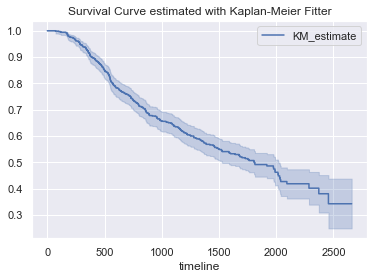

In [5]:
from lifelines import KaplanMeierFitter
 
kmf = KaplanMeierFitter()
kmf.fit(durations=data_y.time, event_observed=data_y.cens)
 
kmf.plot_survival_function()
plt.title('Survival Curve estimated with Kaplan-Meier Fitter')
plt.show()

In [6]:
lst = list([data_x, data_y])
df = pd.concat(lst, axis=1)
df.head()

,age,estrec,horTh,menostat,pnodes,progrec,tgrade,tsize,cens,time
0,70.0,66.0,no,Post,3.0,48.0,II,21.0,True,1814.0
1,56.0,77.0,yes,Post,7.0,61.0,II,12.0,True,2018.0
2,58.0,271.0,yes,Post,9.0,52.0,II,35.0,True,712.0
3,59.0,29.0,yes,Post,4.0,60.0,II,17.0,True,1807.0
4,73.0,65.0,no,Post,1.0,26.0,II,35.0,True,772.0


## Breakout by Factor Hormone Therapy

In [7]:
NoHT = df[df['horTh'] == 'no']
HT = df[df['horTh'] == 'yes']

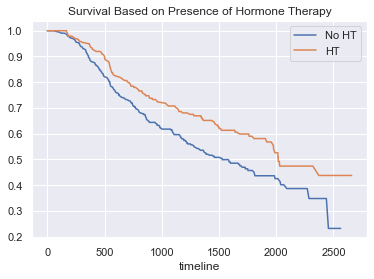

In [8]:
ax = plt.subplot()
 
kmf = KaplanMeierFitter()
kmf.fit(durations=NoHT.time,
event_observed=NoHT.cens, label='No HT')
kmf.survival_function_.plot(ax=ax)
 
kmf.fit(durations=HT.time, event_observed=HT.cens, label='HT')
kmf.survival_function_.plot(ax=ax)
 
plt.title('Survival Based on Presence of Hormone Therapy')
plt.show()

In [9]:
from lifelines.statistics import logrank_test
 
output = logrank_test(
durations_A = NoHT.time,
durations_B = HT.time,
event_observed_A = NoHT.cens,
event_observed_B = HT.cens)
 
output.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
           8.56 <0.005      8.19

## Breakout by Factor Menostat

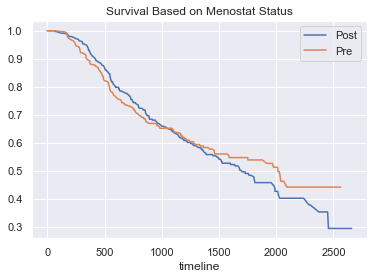

In [10]:
post = df[df['menostat'] == 'Post']
pre = df[df['menostat'] == 'Pre']

ax = plt.subplot()
 
kmf = KaplanMeierFitter()
kmf.fit(durations=post.time,
event_observed=post.cens, label='Post')
kmf.survival_function_.plot(ax=ax)
 
kmf.fit(durations=pre.time, event_observed=pre.cens, label='Pre')
kmf.survival_function_.plot(ax=ax)
 
plt.title('Survival Based on Menostat Status')
plt.show()

In [11]:
output = logrank_test(
durations_A = post.time,
durations_B = pre.time,
event_observed_A = post.cens,
event_observed_B = pre.cens)
 
output.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.28 0.60      0.75

## Breakout by Factor Tumor Grade

In [12]:
df['tgrade'].unique()

[II, III, I]
Categories (3, object): [II, III, I]

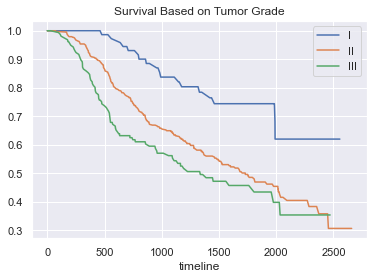

In [13]:
g1 = df[df['tgrade'] == 'I']
g2 = df[df['tgrade'] == 'II']
g3 = df[df['tgrade'] == 'III']

ax = plt.subplot()
 
kmf = KaplanMeierFitter()

kmf.fit(durations=g1.time, event_observed=g1.cens, label='I')
kmf.survival_function_.plot(ax=ax)
 
kmf.fit(durations=g2.time, event_observed=g2.cens, label='II')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=g3.time, event_observed=g3.cens, label='III')
kmf.survival_function_.plot(ax=ax)
    
plt.title('Survival Based on Tumor Grade')
plt.show()

In [14]:
output = logrank_test(
durations_A = g2.time,
durations_B = g3.time,
event_observed_A = g2.cens,
event_observed_B = g3.cens)
 
output.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           4.43 0.04      4.82

## Cox Proportional Hazards Model

In [15]:
from sksurv.preprocessing import OneHotEncoder

df_numeric = OneHotEncoder().fit_transform(df)
df_numeric.head()

,age,estrec,horTh=yes,menostat=Post,pnodes,progrec,tgrade=II,tgrade=III,tsize,cens,time
0,70.0,66.0,0.0,1.0,3.0,48.0,1.0,0.0,21.0,True,1814.0
1,56.0,77.0,1.0,1.0,7.0,61.0,1.0,0.0,12.0,True,2018.0
2,58.0,271.0,1.0,1.0,9.0,52.0,1.0,0.0,35.0,True,712.0
3,59.0,29.0,1.0,1.0,4.0,60.0,1.0,0.0,17.0,True,1807.0
4,73.0,65.0,0.0,1.0,1.0,26.0,1.0,0.0,35.0,True,772.0


In [16]:
from lifelines import CoxPHFitter

coxph = CoxPHFitter()
coxph.fit(df_numeric, duration_col='time', event_col='cens')
 
coxph.print_summary()

<lifelines.CoxPHFitter: fitted with 686 total observations, 387 right-censored observations>
             duration col = 'time'
                event col = 'cens'
      baseline estimation = breslow
   number of observations = 686
number of events observed = 299
   partial log-likelihood = -1735.73
         time fit was run = 2022-05-31 16:51:40 UTC

---
                coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                             
age            -0.01       0.99       0.01            -0.03             0.01                 0.97                 1.01
estrec          0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
horTh=yes      -0.35       0.71       0.13            -0.60            -0.09                 0.55                 0.91
menostat=Post   0.26       1.29       0.18            -0.10             0.62                 0.90                 1.86
pnodes          0.05       1.05       0.01             0.03             0.06                 1.03                 1.07
progrec        -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
tgrade=II       0.64       1.89       0.25             0.15             1.12                 1.16                 3.08
tgrade=III      0.78       2.18       0.27             0.25             1.31                 1.29                 3.69
tsize           0.01       1.01       0.00             0.00             0.02                 1.00                 1.02

                cmp to     z      p   -log2(p)
covariate                                     
age               0.00 -1.02   0.31       1.69
estrec            0.00  0.44   0.66       0.60
horTh=yes         0.00 -2.68   0.01       7.10
menostat=Post     0.00  1.41   0.16       2.65
pnodes            0.00  6.55 <0.005      34.03
progrec           0.00 -3.87 <0.005      13.14
tgrade=II         0.00  2.55   0.01       6.55
tgrade=III        0.00  2.90 <0.005       8.08
tsize             0.00  1.98   0.05       4.39
---
Concordance = 0.69
Partial AIC = 3489.46
log-likelihood ratio test = 104.75 on 9 df
-log2(p) of ll-ratio test = 59.01

### Coefficients and Confidence Intervals

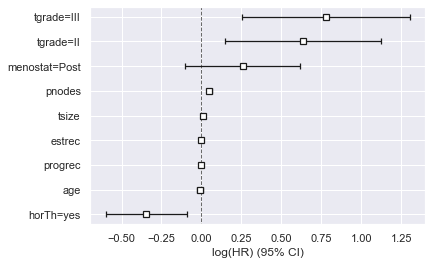

In [17]:
coxph.plot();

## Predict Survival Probabilities by Subject

In [18]:
df_new = df_numeric[df_numeric['cens'] == 0]
df_new_obs = df_new['time']
coxph.predict_survival_function(df_new,conditional_after=df_new_obs)

,6,7,9,12,13,14,17,18,21,22,...,668,669,670,671,674,675,677,678,681,682
8.0,1.000000,1.000000,0.950834,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.957289,0.996838,0.989228,1.000000,0.996682,0.998466,0.998911,0.995347,0.991592,0.994823
15.0,1.000000,1.000000,0.933917,1.000000,1.000000,1.000000,0.994808,0.999072,1.000000,1.000000,...,0.930874,0.993637,0.977988,0.992404,0.996682,0.997952,0.992375,0.991622,0.983181,0.992305
16.0,1.000000,1.000000,0.925571,1.000000,1.000000,1.000000,0.994808,0.998886,1.000000,1.000000,...,0.929335,0.993637,0.977538,0.990843,0.996682,0.997952,0.992375,0.991156,0.983181,0.992009
17.0,1.000000,1.000000,0.919137,1.000000,1.000000,1.000000,0.994808,0.998701,1.000000,1.000000,...,0.927027,0.993637,0.977089,0.989285,0.996682,0.997952,0.992375,0.990691,0.983181,0.991713
18.0,1.000000,1.000000,0.912749,1.000000,1.000000,1.000000,0.993052,0.998515,1.000000,1.000000,...,0.924725,0.993637,0.976640,0.987729,0.996682,0.997608,0.991866,0.990691,0.983181,0.991417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551.0,0.874354,0.836687,0.584852,0.699951,0.514641,0.744242,0.726847,0.857519,0.640537,0.514437,...,0.062715,0.605762,0.351679,0.316120,0.544604,0.829908,0.503702,0.533894,0.291418,0.075977
2556.0,0.874354,0.836687,0.584852,0.699951,0.514641,0.744242,0.726847,0.857519,0.640537,0.514437,...,0.062715,0.605762,0.351679,0.316120,0.544604,0.829908,0.503702,0.533894,0.291418,0.075977
2563.0,0.874354,0.836687,0.584852,0.699951,0.514641,0.744242,0.726847,0.857519,0.640537,0.514437,...,0.062715,0.605762,0.351679,0.316120,0.544604,0.829908,0.503702,0.533894,0.291418,0.075977
2612.0,0.874354,0.836687,0.584852,0.699951,0.514641,0.744242,0.726847,0.857519,0.640537,0.514437,...,0.062715,0.605762,0.351679,0.316120,0.544604,0.829908,0.503702,0.533894,0.291418,0.075977


## Check Proportional Hazard Assumption

In [19]:
coxph.check_assumptions(df_numeric)

Proportional hazard assumption looks okay.


[]